# Comprehensive Data Analysis

Before tackling any problem with complex mathematics it is vital to understand the data. 

- Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
- Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
- Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
- Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
- Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Let's move away from using Plotly to Seaborn as it has some really useful utlities to get us started.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

In [7]:
DIR = '~/notebooks/erudition/data/kaggle/house-prices-advanced-regression-techniques'

In [76]:
# bring in the data
df =pd.read_csv(DIR + os.sep + 'train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# check the decoration
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We ultimately care about the SalePrice so lets carry out some initial analysis

In [13]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There looks to be a large range between the lowest and highest priced houses.
Let's plot a histogram to visualise this range

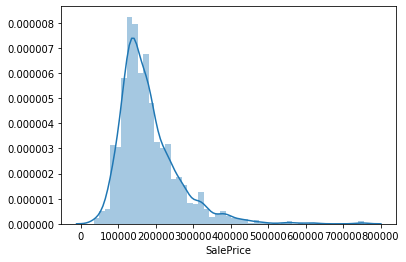

In [14]:
sns.distplot(df.SalePrice)

At first glance we can clearly see it:

- Deviates from the normal distribution.
- Has appreciable positive skewness.
- Shows peakedness.

In [16]:
# lets dig further into the shape of the curve

print('Skewness: ', df.SalePrice.skew(), ' Kurtosis: ', df.SalePrice.kurt())

Skewness:  1.8828757597682129  Kurtosis:  6.536281860064529


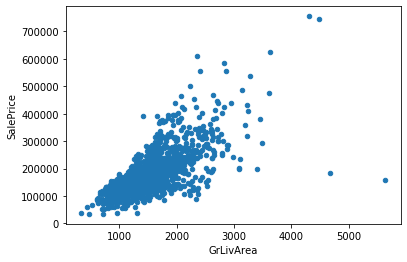

In [18]:
p=df.plot.scatter(x='GrLivArea', y='SalePrice')

Looks like a nice linear relationship between these two **independent variables**

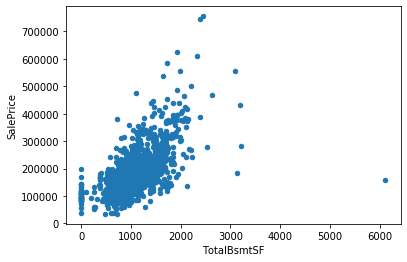

In [31]:
p=df.plot.scatter(x='TotalBsmtSF', y='SalePrice')

There now appears to be some features around TotalBsmtSF=0 and a more exponential relationship. The larger the TotalBsmtSF value the more increase we see in the SalePrice value.

What about the relationships to more caregoricl features

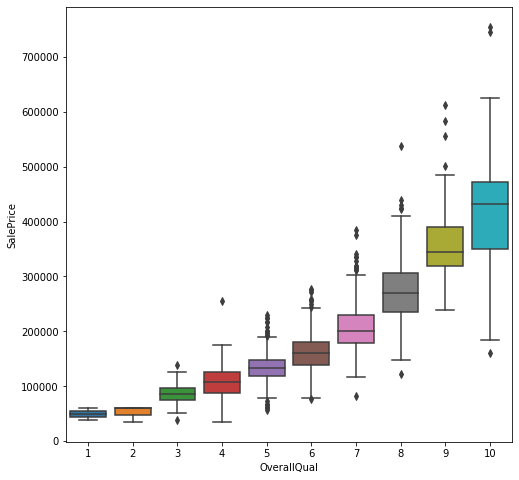

In [32]:
f, ax = plt.subplots(figsize=(8, 8))
p=sns.boxplot(x='OverallQual', y="SalePrice", data=df)

There is an obvious relationship between the overall quality andthe sales price. Better quality = higher sale price.

What about the year the property was built?

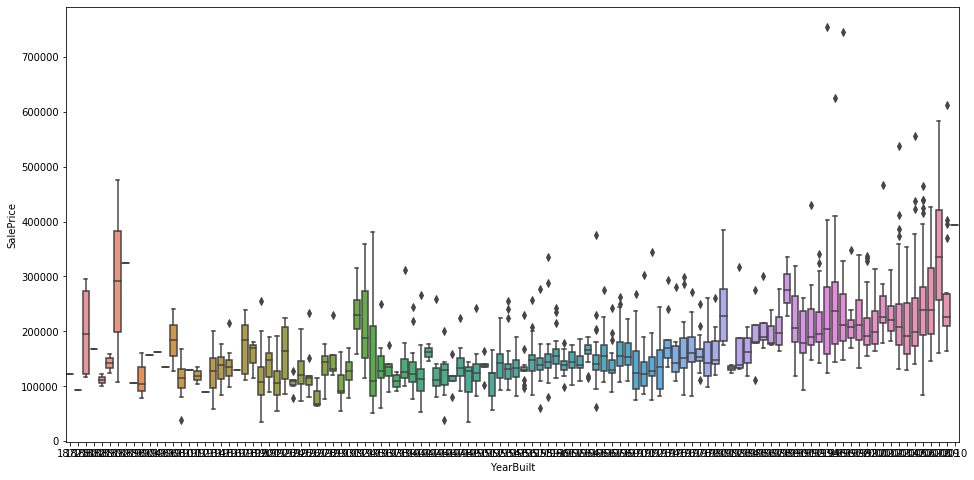

In [33]:
f, ax = plt.subplots(figsize=(16, 8))
p=sns.boxplot(x='YearBuilt', y="SalePrice", data=df)

# Plasma Soup

We know more about the data now and have some obvious trends as surfaced above but how do all the features relate to one another?

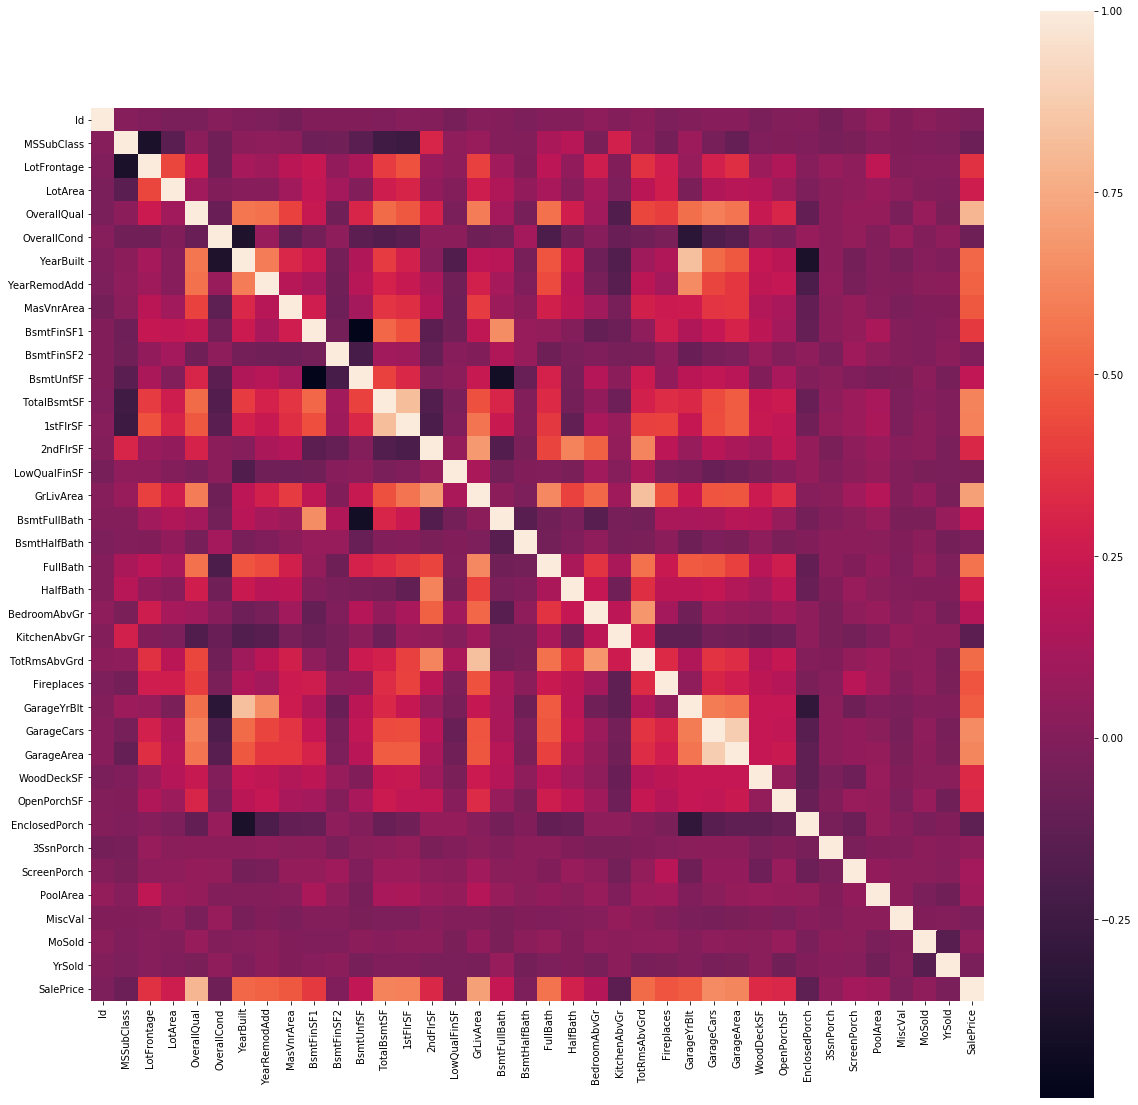

In [43]:
corrmap = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
p=sns.heatmap(corrmap, square=True)

That's a lot of data although there are some obvious features which are highly correlated. Let's explore the top 10.

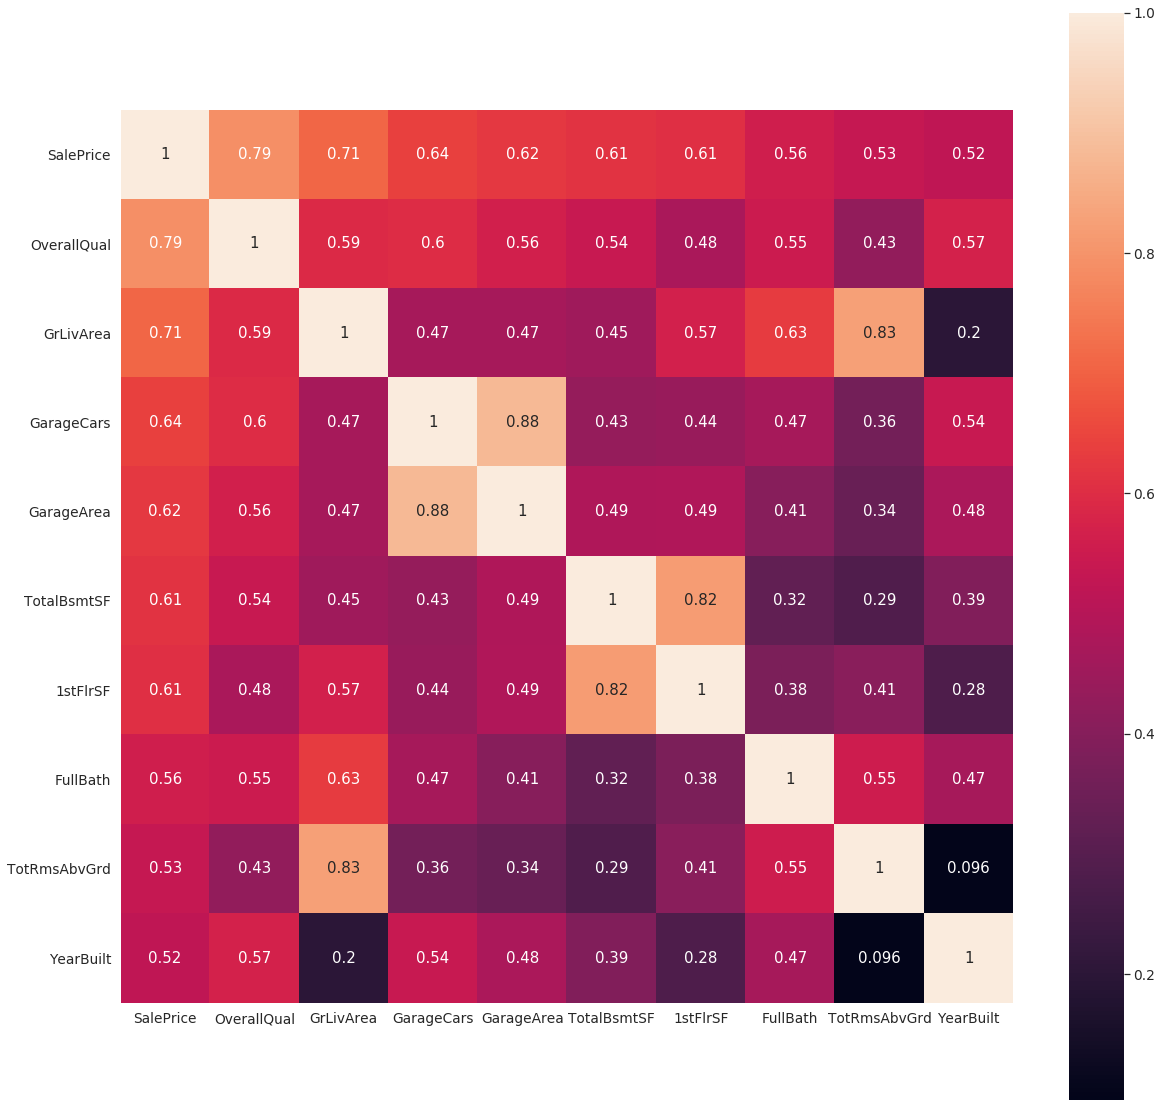

In [52]:
corrmap = df.corr()
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
corrmap = df[cols].corr()
f, ax = plt.subplots(figsize=(20, 20))
p=sns.heatmap(corrmap, square=True, annot=True)

With this information we can now look at the actual scatter plot relationships between the features using Seaborns pairplot.

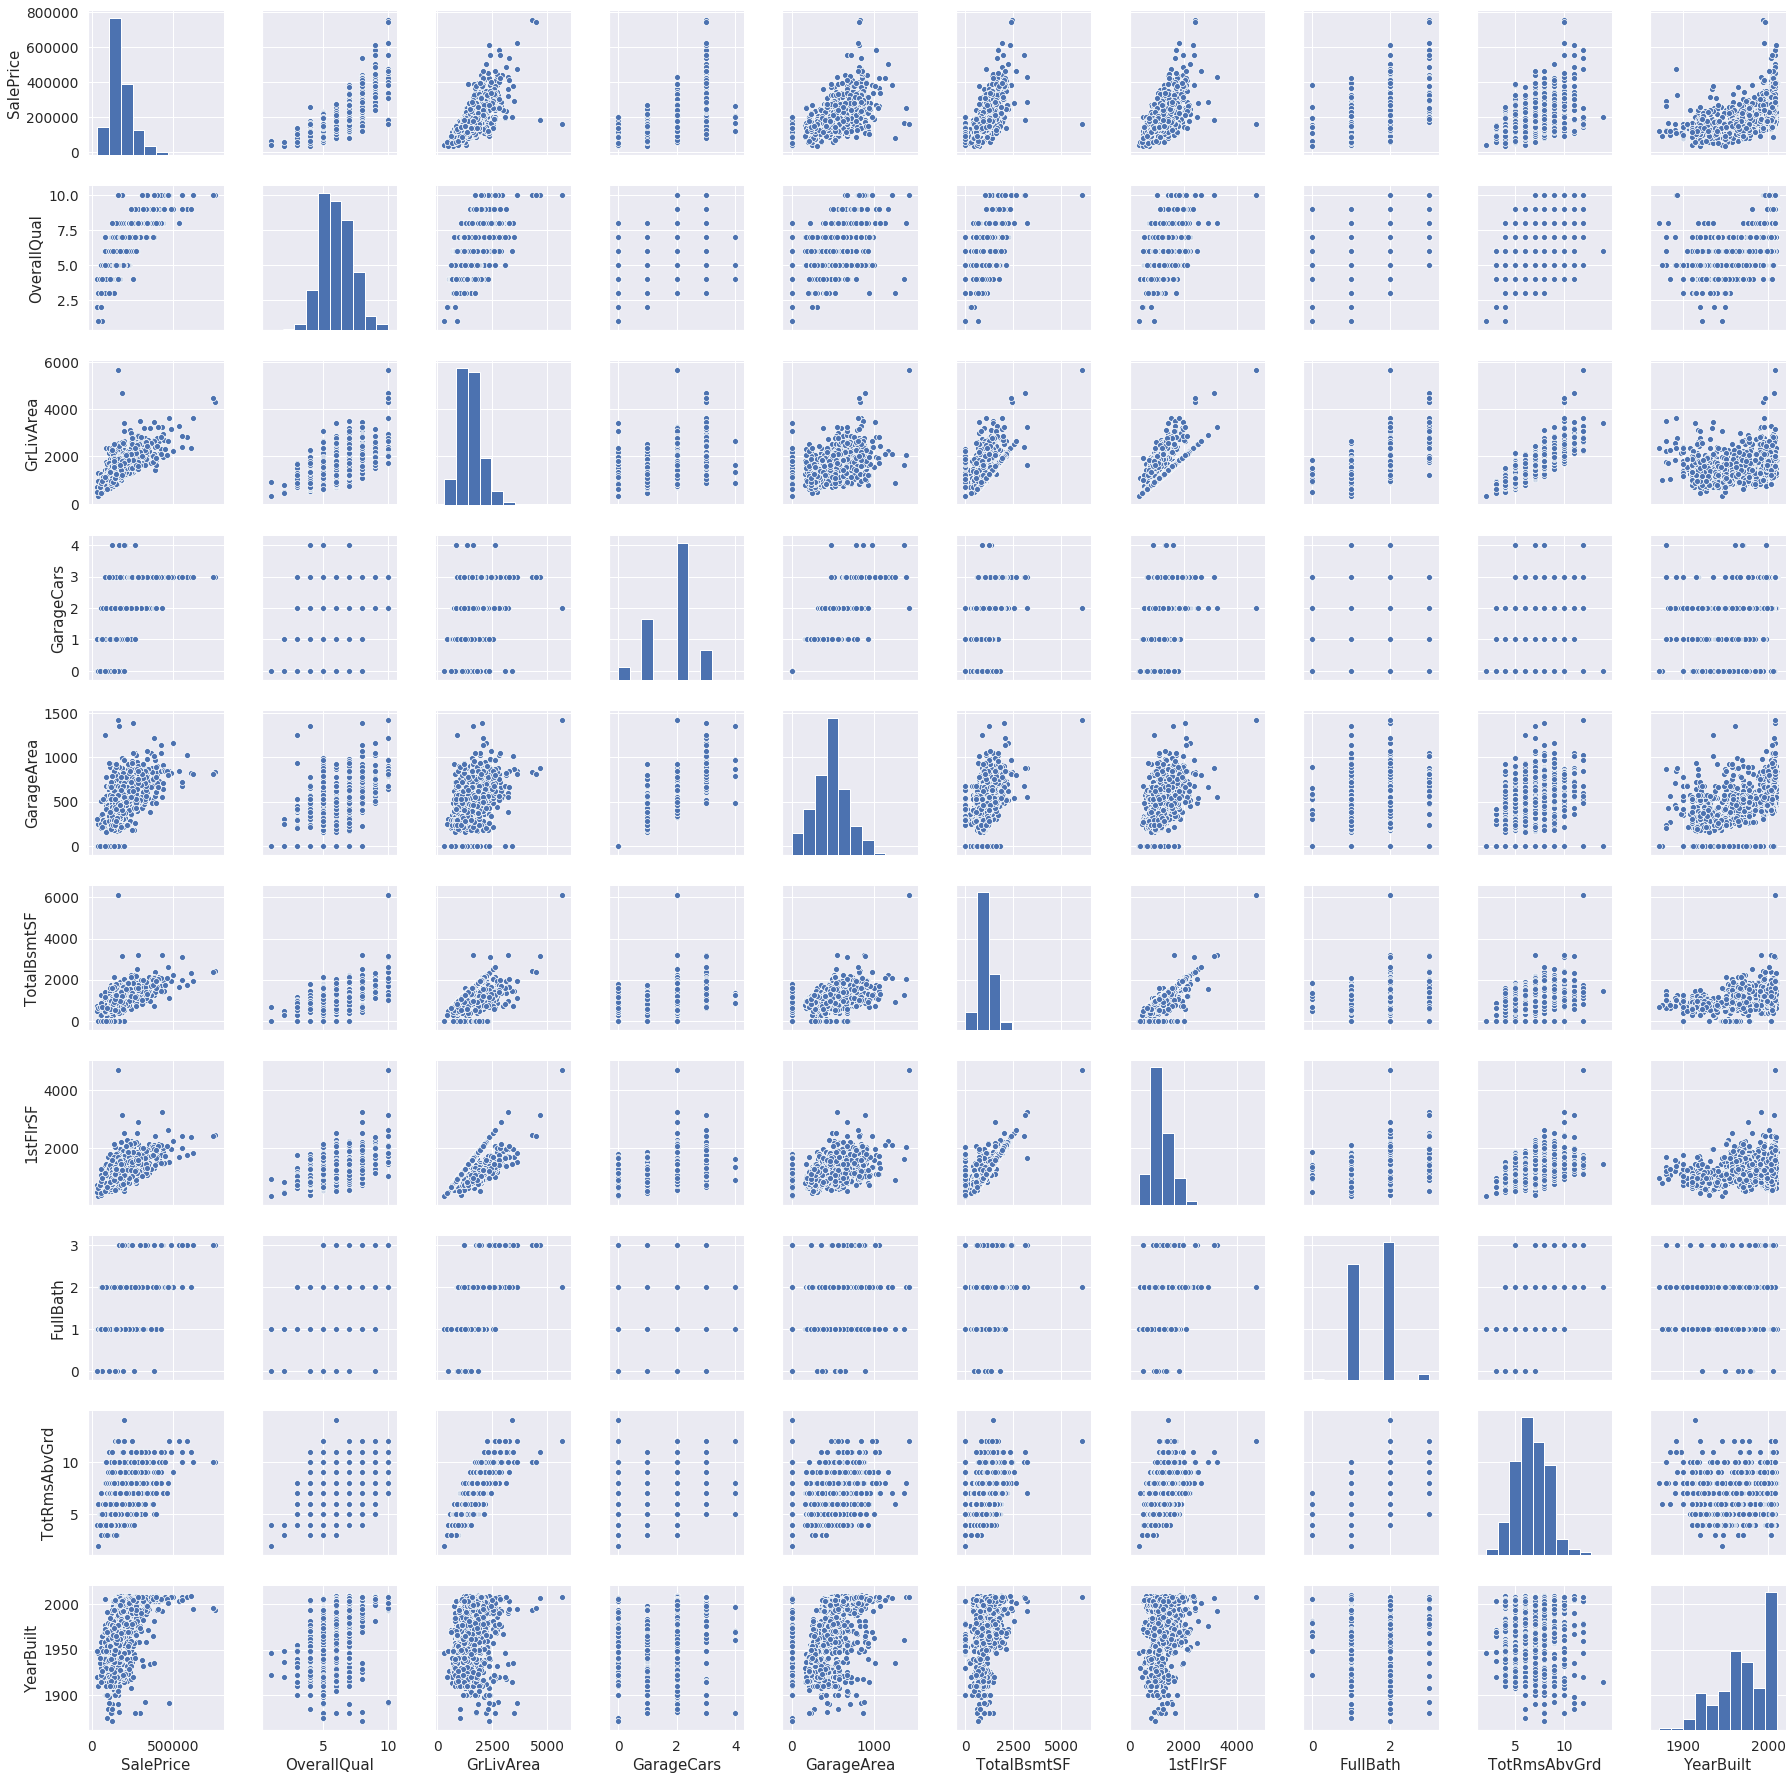

In [53]:
p=sns.pairplot(df[cols])

# Mising Data

Is there anything missing in our data? This can have a huge effect on any training model.


In [73]:
total = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [79]:
#dealing with missing data
df= df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

In [81]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# Out liars

Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

# Four assumptions should be tested

According to Hair et al. (2013)

https://is.muni.cz/el/1423/podzim2017/PSY028/um/_Hair_-_Multivariate_data_analysis_7th_revised.pdf

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

- **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Start with a search for Normality

- **Histogram** - Kurtosis and skewness.
- **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

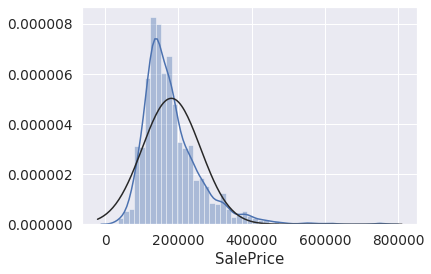

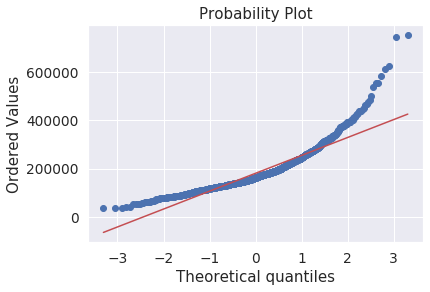

In [89]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()

# Calculate quantiles for a probability plot, and optionally show the plot.
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(df['SalePrice'], plot=plt)

Hmmmm, the SalePrice does not appear normal. It shows peakedness, positive skewness and does not follow the diagonal line that would indicate a purely normaly distribution.

# POSITIVE SKEWNESS & LOG TRANSFORM

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

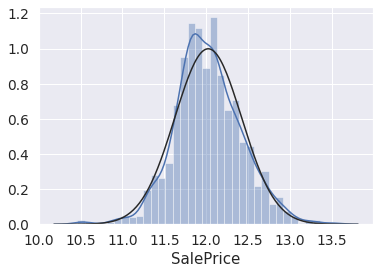

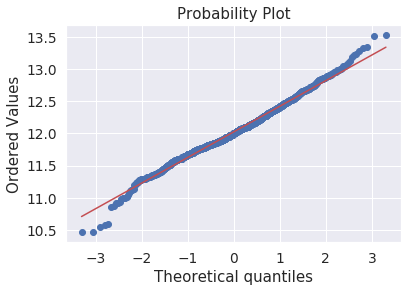

In [90]:
df.SalePrice = np.log(df.SalePrice)

sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()

# Calculate quantiles for a probability plot, and optionally show the plot.
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(df['SalePrice'], plot=plt)

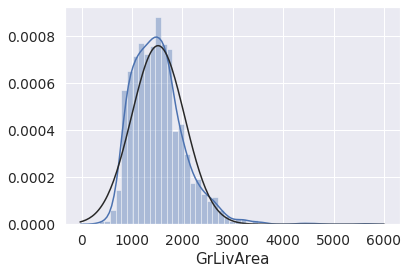

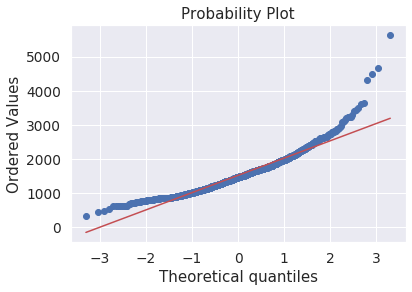

In [92]:
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()

# Calculate quantiles for a probability plot, and optionally show the plot.
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(df['GrLivArea'], plot=plt)

Looks like a similar issue as before, let transform and re-draw

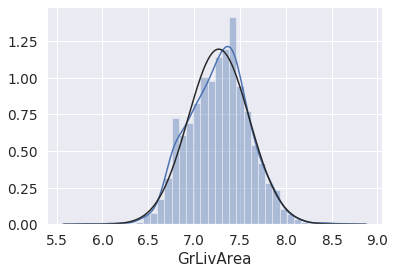

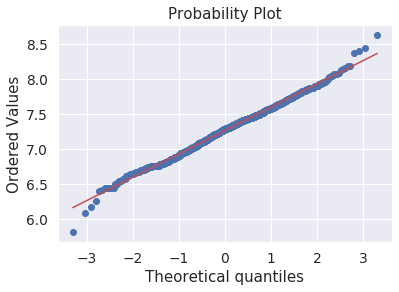

In [93]:
df.GrLivArea = np.log(df.GrLivArea)

sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()

# Calculate quantiles for a probability plot, and optionally show the plot.
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(df['GrLivArea'], plot=plt)

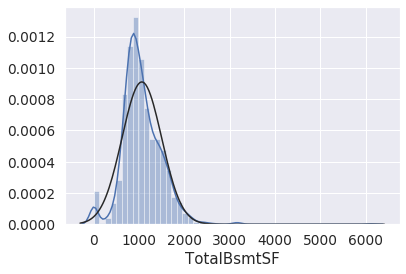

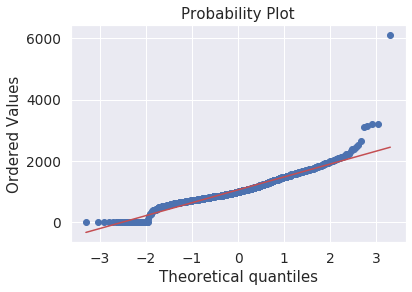

In [94]:
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()

# Calculate quantiles for a probability plot, and optionally show the plot.
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(df['TotalBsmtSF'], plot=plt)